<a href="https://colab.research.google.com/github/EisaacJC/Ciencia-de-Datos-Personal/blob/master/Hyperparameter_Configuration_in_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In general, an AI model can be expressed as a function $ M(\lambda_1, \lambda_2, \ldots, \lambda_i, \lambda_n) = M(\vec{\lambda}) $, where $ \lambda_i \in \mathbb{R} $. Finding a set of hyperparameters such that the model performs well is essentially an optimization problem. However, solving such problems becomes exceedingly challenging for tasks that are not straightforward.

Various classical approaches exist to address this optimization problem:

1. **Grid Search:** Grid Search involves exploring a subset $Q \subset \mathbb{R}^n $ and evaluating the model for all n-tuples within this subset. This method becomes impractical for models with a high number of dimensions. Even with a small dimension for the hyperparameter vector $ \vec{\lambda} $ (e.g., $ \dim \lambda = 2 $), the exploration becomes computationally intensive, especially without restricting the possible values of the $ \lambda_i $ components.

2. **Random Search:** Random Search operates similarly to Grid Search over the subset $ Q $. However, in this case, the $ \lambda_i $ values are sampled from a random probability distribution function. This randomness can be beneficial, as it may help discover minima or maxima points that might be missed by a structured grid proposed in Grid Search.

Addressing hyperparameter optimization is crucial for enhancing the performance of machine learning models, and the choice of method depends on the specific characteristics of the problem at hand, including the dimensionality of the hyperparameter space and the available computational resources.




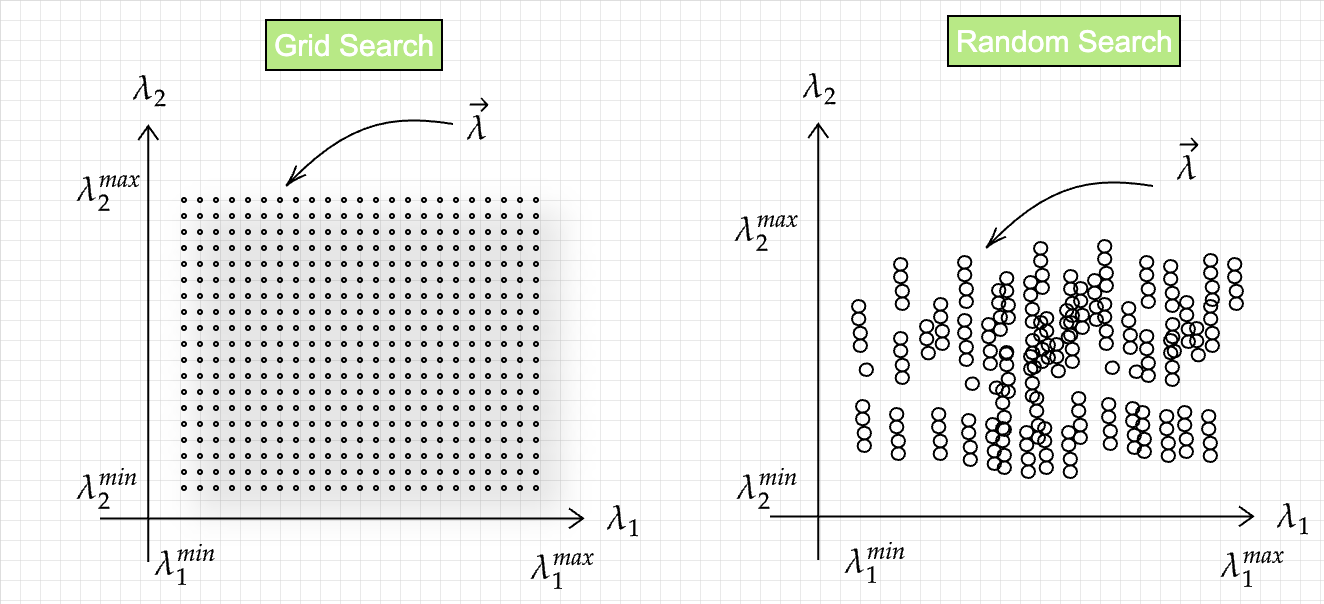

## Typical hyperparameters found in a Neural Network
For example, we can consider a moden $M$ that represents a Neural Network, some typical parameters of a Neural Network are:
Number of Hidden Layers: The choice of the number of hidden layers in the neural network.

- Number of Neurons in Each Hidden Layer: The number of neurons (or units) in each hidden layer. This determines the capacity or expressiveness of the model.

- Activation Function: The activation function applied to each neuron in the hidden layers. Common choices include ReLU (Rectified Linear Unit), sigmoid, or tanh.

- Learning Rate: A hyperparameter that controls the step size during optimization. It influences how quickly the model learns and can impact convergence.

- Loss Function: The loss function measures the difference between the predicted output and the actual target. It is a crucial hyperparameter, and common choices include mean squared error for regression tasks and categorical crossentropy for classification tasks.

- Optimizer: The optimization algorithm used to update the weights of the neural network during training. Popular optimizers include stochastic gradient descent (SGD), Adam, and RMSprop.

- Batch Size: The number of training samples used in each iteration of training. It affects the speed and memory requirements during training.

- Epochs: The number of times the entire training dataset is processed by the neural network during training. One epoch consists of one forward pass and one backward pass for all training samples.

- Dropout: A regularization technique that randomly drops a fraction of neurons during training to prevent overfitting.

- Weight Initialization: The method used to initialize the weights of the neural network. Common methods include random initialization or using pre-trained weights.

- Input and Output Layer Configuration: The number of neurons in the input and output layers, which is determined by the features of the input data and the nature of the task (e.g., binary classification, multi-class classification, regression).

## Why this is a complicated problem?
So far we enlisted eleven hyperparameters to be tunned, if we suppose that our model has to be great for classification/regression problems we can be interested in maximize our accuracy.
Even when this proposal is simple is very complicated to obtain a set of $\lambda_i$ such the accuracy is guided towards its maximum, imagine if we consider that all the parameters can take values in the real interval of $\lambda_i\in [0,1]$ ¡¡¡THERE ARE INFINITE NUMBERS IN THAT INTERVAL!!!!, so what's goin on?


We need to tackle this problem obviously with a refinement of the set, if we consider a refinement to be or the order of 1000 points, this is, steps of the order of $1 \times 10^{-3}$ for eleven hyperparameters this turns into a $1000^{11}$ possible solutions.

## Implementing a simple Neural Network
In order to study the complications of a Grid Search and a Random search we're going to implement a simple NN model with only four hyperparameters to optimize and study the behaviour under the action of both search methods.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

To simplify the implementation we are going to use a built-in function to generate samples and stablish our problem of binary classification (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

In [4]:
set_seed=1111
X, y = make_classification(n_samples=3000, n_features=10, n_classes=2, random_state=set_seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=set_seed)

Now we create a model based on a simple structure

In [5]:
def create_model(hidden_layers, neurons, learning_rate, batch_size):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [18]:
# @title Defining a search space
# @markdown Here we create a set of possible values to explore, this implementation is obviusly very small, but even with this small set of values we can explore in a small scale the behaviour of both methods.


hyperparameter_space = {
    'hidden_layers': [1, 2, 3],
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64]
}

## Grid Search

In [19]:
best_accuracy = 0
hyperparameters_list = []
accuracy_list = []
best_hyperparameters = {}
for hidden_layers in hyperparameter_space['hidden_layers']:
    for neurons in hyperparameter_space['neurons']:
        for learning_rate in hyperparameter_space['learning_rate']:
            for batch_size in hyperparameter_space['batch_size']:
                model = create_model(hidden_layers, neurons, learning_rate, batch_size)
                model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=0)
                _, accuracy = model.evaluate(X_test, y_test, verbose=0)

                # Store hyperparameters and accuracy
                hyperparameters_list.append({'hidden_layers': hidden_layers, 'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size})
                accuracy_list.append(accuracy)

In [11]:
print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters:
{'hidden_layers': 2, 'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32}
Best Accuracy: 0.9833333492279053


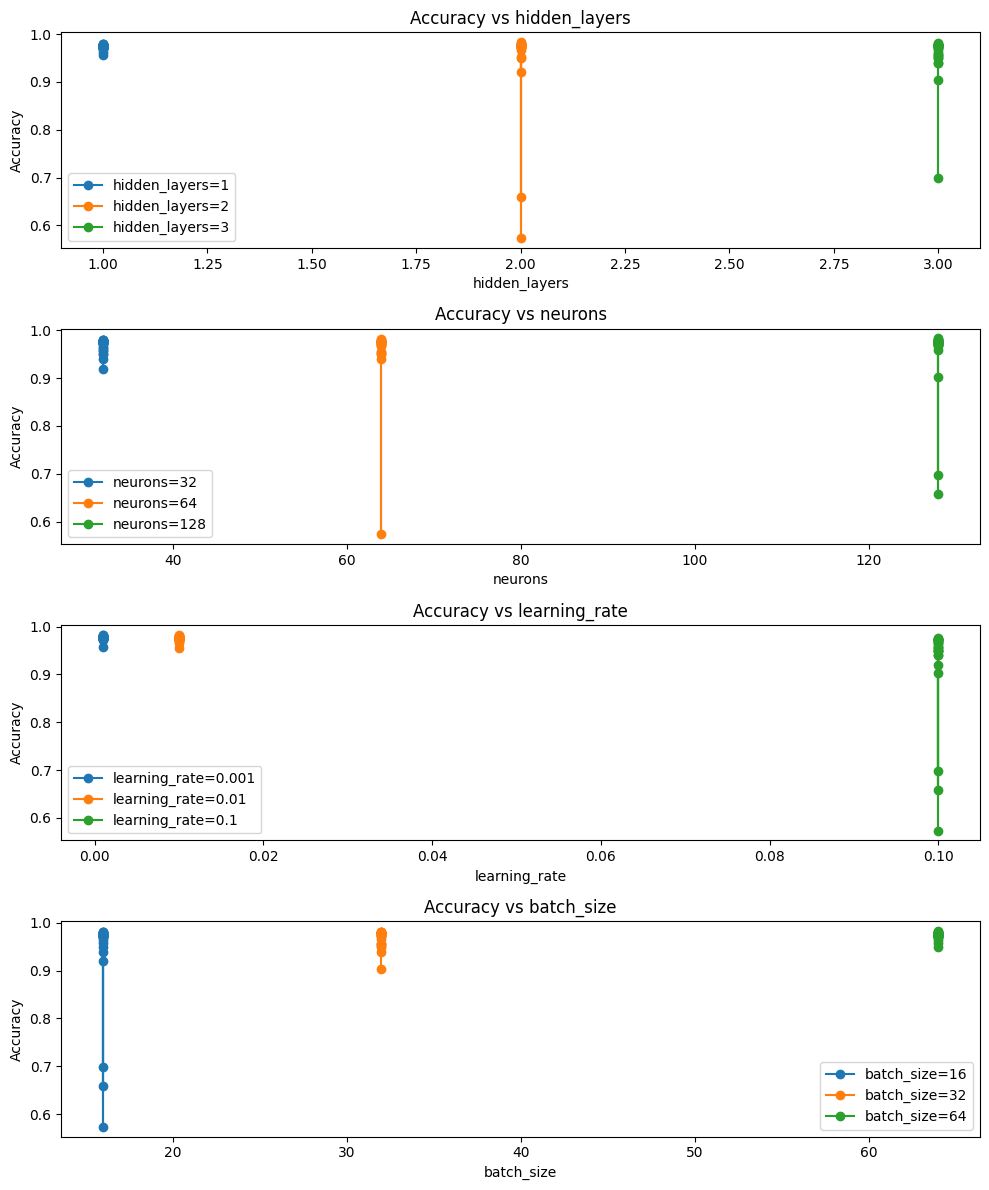

In [24]:
# Create a separate subplot for each hyperparameter
fig, axes = plt.subplots(len(hyperparameter_space), 1, figsize=(10, 12))

for i, hyperparameter in enumerate(hyperparameter_space.keys()):
    hyperparameter_values = hyperparameter_space[hyperparameter]
    for value in hyperparameter_values:
        grouped_accuracy = [accuracy_list[j] for j in range(len(accuracy_list)) if hyperparameters_list[j][hyperparameter] == value]
        axes[i].plot([value] * len(grouped_accuracy), grouped_accuracy, marker='o', label=f'{hyperparameter}={value}')
    axes[i].set_title(f'Accuracy vs {hyperparameter}')
    axes[i].set_xlabel(hyperparameter)
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()


### Random Search